In [147]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Churn_Modelling.csv",na_values="?")

In [148]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,0.00,1.0,1.0,1,101348.88,1.0
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1.0,0.0,1,112542.58,0.0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.80,3.0,1.0,0,113931.57,1.0
3,4,15701354,Boni,699.0,France,Female,39,1.0,0.00,2.0,0.0,0,93826.63,0.0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1.0,1.0,1,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771.0,France,Male,39,5.0,0.00,2.0,1.0,0,96270.64,0.0
9996,9997,15569892,Johnstone,516.0,France,Male,35,10.0,57369.61,1.0,1.0,1,101699.77,0.0
9997,9998,15584532,Liu,709.0,France,Female,36,7.0,0.00,1.0,0.0,1,42085.58,1.0
9998,9999,15682355,Sabbatini,772.0,Germany,Male,42,3.0,75075.31,2.0,1.0,0,92888.52,1.0


In [149]:
for col in df:
    print(df[col].value_counts())

RowNumber
9984    1
9983    1
9982    1
9981    1
9980    1
       ..
5       1
4       1
3       1
2       1
1       1
Name: count, Length: 10000, dtype: int64
CustomerId
15656710    1
15768163    1
15672754    1
15719276    1
15692664    1
           ..
15737888    1
15701354    1
15619304    1
15647311    1
15634602    1
Name: count, Length: 10000, dtype: int64
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Boan         1
Topp         1
Burgoyne     1
Gebhart      1
Goforth      1
Name: count, Length: 2932, dtype: int64
CreditScore
850.0    233
678.0     63
655.0     54
705.0     53
667.0     53
        ... 
358.0      1
412.0      1
382.0      1
373.0      1
419.0      1
Name: count, Length: 460, dtype: int64
Geography
France     5014
Germany    2507
Spain      2477
Name: count, dtype: int64
Gender
Male      5455
Female    4542
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82   

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          9998 non-null   object 
 3   CreditScore      9999 non-null   float64
 4   Geography        9998 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              10000 non-null  int64  
 7   Tenure           9999 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    9997 non-null   float64
 10  HasCrCard        9999 non-null   float64
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9998 non-null   float64
 13  Exited           9999 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 1.1+ MB


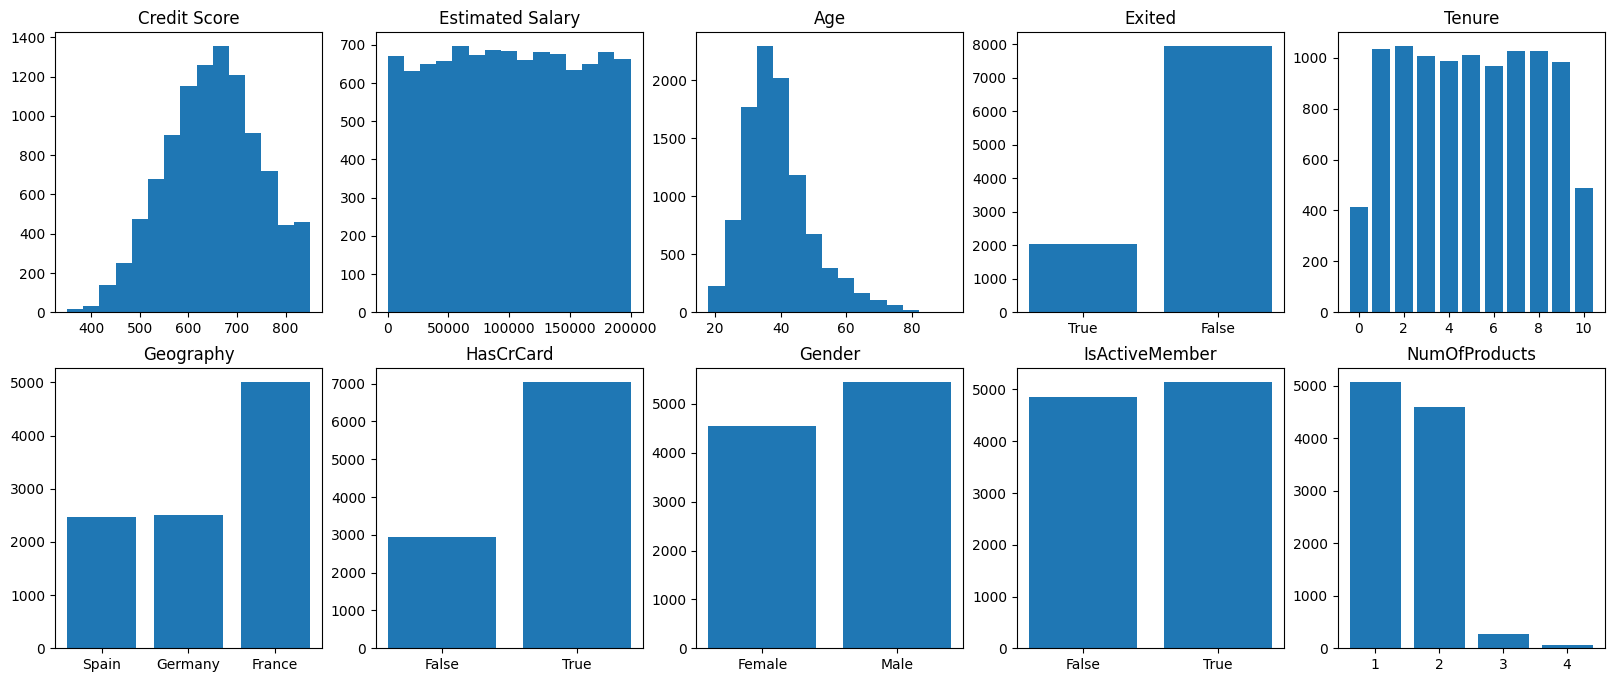

In [151]:
fig , axes = plt.subplots(2,5,figsize=(20, 8))

axes[0][0].hist(df. CreditScore,bins=15)
axes[0][0].set_title("Credit Score")

axes[0][1].hist(df. EstimatedSalary,bins=15)
axes[0][1].set_title("Estimated Salary")

axes[0][2].hist(df.Age , bins=15)
axes[0][2].set_title("Age")

df_exited=df.groupby("Exited").size().sort_values().reset_index()
df_exited["Exited"] = df["Exited"].map({0:"False",1:"True"})
axes[0][3].bar(df_exited["Exited"],df_exited[0])
axes[0][3].set_title("Exited")


df_ten=df.groupby("Tenure").size().sort_values().reset_index()
axes[0][4].bar(df_ten["Tenure"],df_ten[0])
axes[0][4].set_title("Tenure")


df_geo=df.groupby("Geography").size().sort_values().reset_index()
axes[1][0].bar(df_geo["Geography"],df_geo[0])
axes[1][0].set_title("Geography")


df_card=df.groupby("HasCrCard").size().sort_values().reset_index()
df_card["HasCrCard"] = df_card["HasCrCard"].map({0:"False",1:"True"})
axes[1][1].bar(df_card["HasCrCard"],df_card[0])
axes[1][1].set_title("HasCrCard")


df_gen=df.groupby("Gender").size().sort_values().reset_index()
axes[1][2].bar(df_gen["Gender"],df_gen[0])
axes[1][2].set_title("Gender")


df_act=df.groupby("IsActiveMember").size().sort_values().reset_index()
df_act["IsActiveMember"] = df_act["IsActiveMember"].map({0:"False",1:"True"})
axes[1][3].bar(df_act["IsActiveMember"],df_act[0])
axes[1][3].set_title("IsActiveMember")


df_np=df.groupby("NumOfProducts").size().sort_values().reset_index()
axes[1][4].bar(df_np["NumOfProducts"],df_np[0])
axes[1][4].set_title("NumOfProducts")

fig.savefig('test.png', bbox_inches='tight')

## Przygotowanie danych do modelowania

### Usuwanie zbędnych kolumn i zamiana indexu na CustomerId

In [152]:
df.drop(columns=["RowNumber","Surname"],inplace=True)
df.set_index("CustomerId",inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619.0,France,Female,42,2.0,0.00,1.0,1.0,1,101348.88,1.0
15647311,608.0,Spain,Female,41,1.0,83807.86,1.0,0.0,1,112542.58,0.0
15619304,502.0,France,Female,42,8.0,159660.80,3.0,1.0,0,113931.57,1.0
15701354,699.0,France,Female,39,1.0,0.00,2.0,0.0,0,93826.63,0.0
15737888,850.0,Spain,Female,43,2.0,125510.82,1.0,1.0,1,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771.0,France,Male,39,5.0,0.00,2.0,1.0,0,96270.64,0.0
15569892,516.0,France,Male,35,10.0,57369.61,1.0,1.0,1,101699.77,0.0
15584532,709.0,France,Female,36,7.0,0.00,1.0,0.0,1,42085.58,1.0


### Sprawdzenie brakujących wartośći

In [153]:
df.isna().sum()

CreditScore        1
Geography          2
Gender             3
Age                0
Tenure             1
Balance            0
NumOfProducts      3
HasCrCard          1
IsActiveMember     0
EstimatedSalary    2
Exited             1
dtype: int64

### Usunięcie wierszy z pustą wartością Exited

In [154]:
df.dropna(subset=["Exited"],inplace=True)

### Zastąpinie wartości brakujących Geography, Gender,HasCrCard, NumOfProducts modą

In [155]:
df.loc[df["Geography"].isna(),["Geography"]] = df["Geography"].mode()[0]
df.loc[df["Gender"].isna(),["Gender"]] = df["Gender"].mode()[0]
df.loc[df["HasCrCard"].isna(),["HasCrCard"]] = df["HasCrCard"].mode()[0]
df.loc[df["NumOfProducts"].isna(),["NumOfProducts"]] = df["NumOfProducts"].mode()[0]

### Zastąpienie wartości brakujących  Tenure, NumOfProducts medianą

In [156]:
df.loc[df["NumOfProducts"].isna(),["NumOfProducts"]] = df["NumOfProducts"].median()
df.loc[df["Tenure"].isna(),["Tenure"]] = df["Tenure"].median()

### Zastąpienie wartości brakujących CreditScore,EstimatedSalary średnią

In [157]:
df.loc[df["CreditScore"].isna(),["CreditScore"]] = df["CreditScore"].mean()
df.loc[df["EstimatedSalary"].isna(),["EstimatedSalary"]] = df["EstimatedSalary"].mean()

In [158]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Uswanie wartości przkraczających z-score dla CreditScore

C:\Users\user\AppData\Local\Temp\ipykernel_12048\1107209718.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["CreditScore"],labels=["Credit Score"])


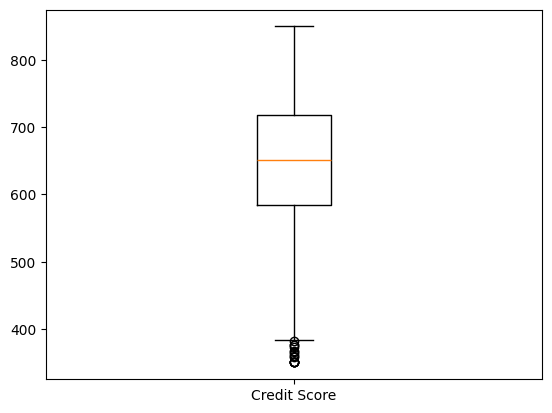

In [159]:
plt.boxplot(df["CreditScore"],labels=["Credit Score"])
credit_z_score = (df["CreditScore"] - df["CreditScore"].mean())/df["CreditScore"].std()
credit_z_score = abs(credit_z_score) > 3
credit_index=credit_z_score[credit_z_score].index
credit_index
df.drop(credit_index.tolist(),inplace=True)

### Sprawdzenie i usnięcie wartości przkraczających z-score dla Age

C:\Users\user\AppData\Local\Temp\ipykernel_12048\4237955359.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["Age"],labels=["Age"])


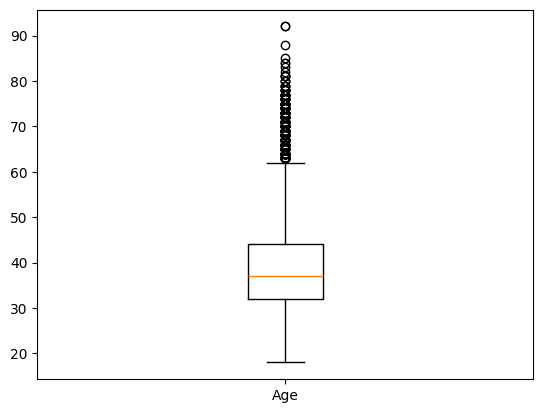

In [160]:
plt.boxplot(df["Age"],labels=["Age"])
age_z_score = (df["Age"] - df["Age"].mean())/df["Age"].std()
age_z_score = abs(age_z_score) >3
age_index = age_z_score[age_z_score].index
df.drop(age_index.tolist(),inplace=True)

### Sprawdzenie i usnięcie wartośc przkraczających z-score dla Balance

C:\Users\user\AppData\Local\Temp\ipykernel_12048\133404765.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["Balance"],labels=["Balance"])


{'whiskers': [<matplotlib.lines.Line2D at 0x24f88199a60>,
 'caps': [<matplotlib.lines.Line2D at 0x24f8819ad20>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f91862480>],
 'medians': [<matplotlib.lines.Line2D at 0x24f8819b980>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f8826fb90>],
 'means': []}

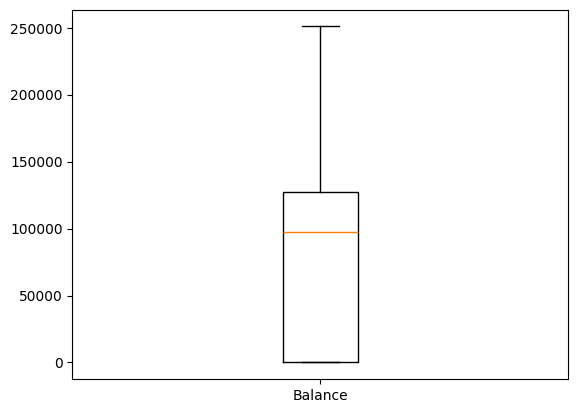

In [161]:
plt.boxplot(df["Balance"],labels=["Balance"])

### Sprawdzenie i usnięcie wartośc przkraczających z-score dla Tenure

C:\Users\user\AppData\Local\Temp\ipykernel_12048\2074182797.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["Tenure"],labels=["Tenure"])


{'whiskers': [<matplotlib.lines.Line2D at 0x24f88355100>,
 'caps': [<matplotlib.lines.Line2D at 0x24f88354530>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f88356a50>],
 'medians': [<matplotlib.lines.Line2D at 0x24f88354dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f88356f90>],
 'means': []}

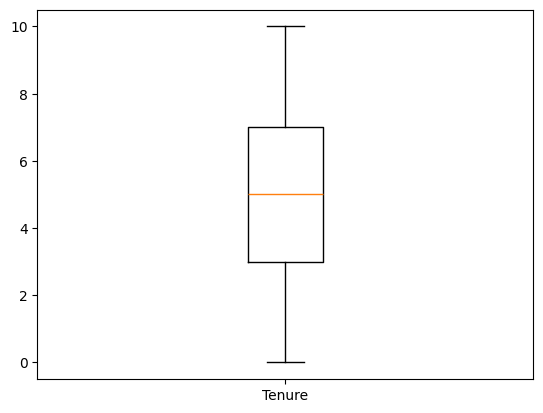

In [162]:
plt.boxplot(df["Tenure"],labels=["Tenure"])

### Sprawdzenie i usnięcie wartośc przkraczających z-score dla NumOfProducts

C:\Users\user\AppData\Local\Temp\ipykernel_12048\1469552065.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["NumOfProducts"],labels=["NumOfProducts"])


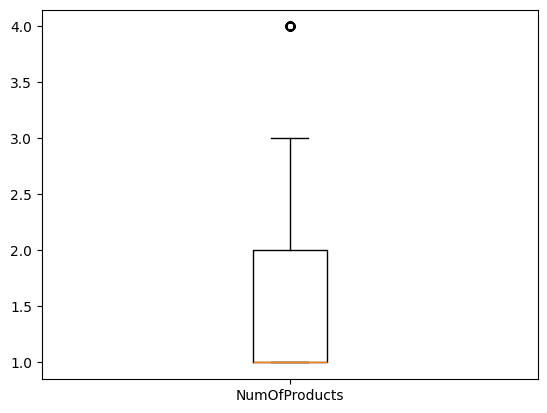

In [163]:
plt.boxplot(df["NumOfProducts"],labels=["NumOfProducts"])
nop_z_score = (df["NumOfProducts"] - df["NumOfProducts"].mean())/df["NumOfProducts"].std()
nop_z_score = abs(nop_z_score) > 3
nop_index = nop_z_score[nop_z_score].index
df.drop(nop_index.tolist(),inplace=True)

### Sprawdzenie i usnięcie wartośc przkraczających z-score dla EstimatedSalary

C:\Users\user\AppData\Local\Temp\ipykernel_12048\1917769223.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df["EstimatedSalary"],labels=["EstimatedSalary"])


{'whiskers': [<matplotlib.lines.Line2D at 0x24f883ceed0>,
 'caps': [<matplotlib.lines.Line2D at 0x24fe2ffdfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f883cd700>],
 'medians': [<matplotlib.lines.Line2D at 0x24fe2fd3860>],
 'fliers': [<matplotlib.lines.Line2D at 0x24fe2fd1160>],
 'means': []}

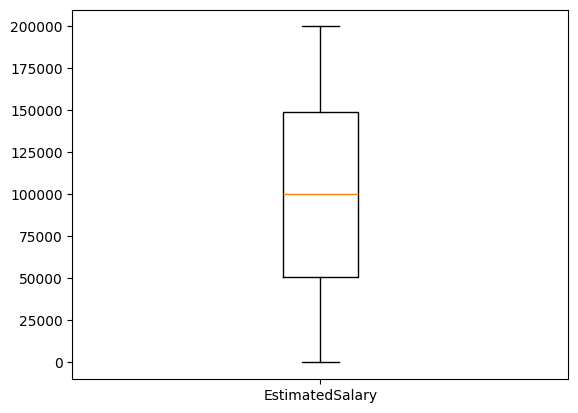

In [164]:
plt.boxplot(df["EstimatedSalary"],labels=["EstimatedSalary"])

## Kodowanie zmiennych Geography

In [165]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
one_hot_encoded = enc.fit_transform(df[["Geography"]])
enc_geo = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out(["Geography"]))
enc_geo.index=df.index
enc_geo
df =pd.merge(df,enc_geo,left_index=True, right_index=True)
df.drop(columns="Geography",inplace=True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15634602,619.0,Female,42,2.0,0.00,1.0,1.0,1,101348.88,1.0,1.0,0.0,0.0
15647311,608.0,Female,41,1.0,83807.86,1.0,0.0,1,112542.58,0.0,0.0,0.0,1.0
15619304,502.0,Female,42,8.0,159660.80,3.0,1.0,0,113931.57,1.0,1.0,0.0,0.0
15701354,699.0,Female,39,1.0,0.00,2.0,0.0,0,93826.63,0.0,1.0,0.0,0.0
15737888,850.0,Female,43,2.0,125510.82,1.0,1.0,1,79084.10,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771.0,Male,39,5.0,0.00,2.0,1.0,0,96270.64,0.0,1.0,0.0,0.0
15569892,516.0,Male,35,10.0,57369.61,1.0,1.0,1,101699.77,0.0,1.0,0.0,0.0
15584532,709.0,Female,36,7.0,0.00,1.0,0.0,1,42085.58,1.0,1.0,0.0,0.0


## Kodowanie zmiennej Gender

In [166]:
from sklearn.preprocessing import OrdinalEncoder
df[["Gender"]] = OrdinalEncoder().fit_transform(df[["Gender"]])

## Zamiana zmiennej przewidywanej na kategoryczną

In [167]:
df["Exited"] = df["Exited"].apply(lambda x : True if x == 1 else False)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,,
15634602,619.0,0.0,42,2.0,0.00,1.0,1.0,1,101348.88,True,1.0,0.0,0.0
15647311,608.0,0.0,41,1.0,83807.86,1.0,0.0,1,112542.58,False,0.0,0.0,1.0
15619304,502.0,0.0,42,8.0,159660.80,3.0,1.0,0,113931.57,True,1.0,0.0,0.0
15701354,699.0,0.0,39,1.0,0.00,2.0,0.0,0,93826.63,False,1.0,0.0,0.0
15737888,850.0,0.0,43,2.0,125510.82,1.0,1.0,1,79084.10,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771.0,1.0,39,5.0,0.00,2.0,1.0,0,96270.64,False,1.0,0.0,0.0
15569892,516.0,1.0,35,10.0,57369.61,1.0,1.0,1,101699.77,False,1.0,0.0,0.0
15584532,709.0,0.0,36,7.0,0.00,1.0,0.0,1,42085.58,True,1.0,0.0,0.0


## Badanie korelacji

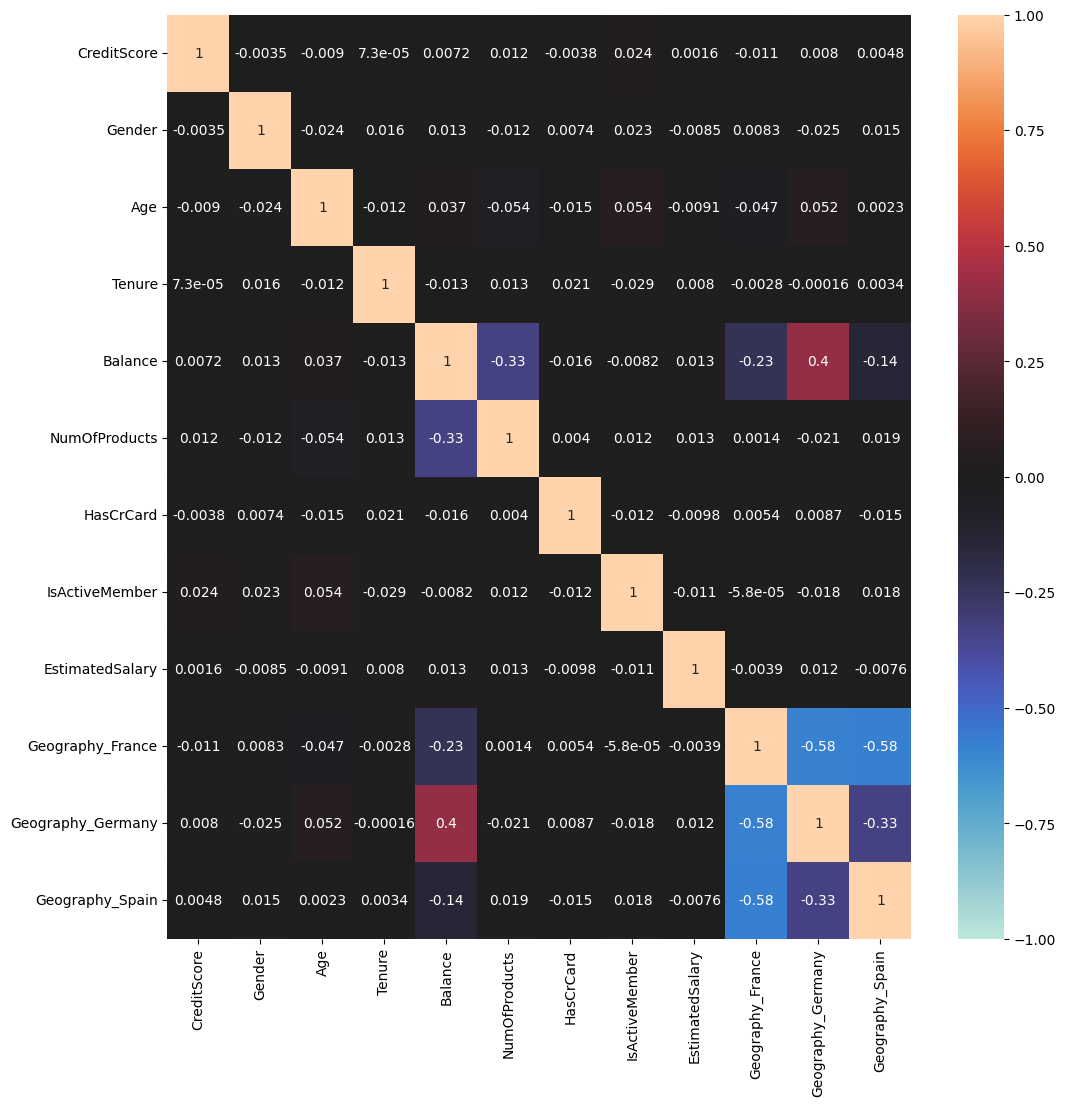

In [168]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']].corr(), annot=True, center=0.0,ax=ax,vmax=1,vmin=-1)

fig.savefig('corr.png', bbox_inches='tight')

## Modelowanie i ewaluacja

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

X = df.drop(columns="Exited")
y= df.Exited
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)


### Regresja logistyczna

In [170]:
l_reg = LogisticRegression()
l_reg_cval = cross_validate(l_reg,X_train,y_train,cv=4,scoring=("accuracy"),return_estimator=True)
l_reg_cval

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

{'fit_time': array([0.13612533, 0.1451335 , 0.13311601, 0.14112067]),
 'score_time': array([0.00400376, 0.00300241, 0.0030036 , 0.00200176]),
 'estimator': [LogisticRegression(),
  LogisticRegression(),
  LogisticRegression(),
  LogisticRegression()],
 'test_score': array([0.81428571, 0.8005102 , 0.80245023, 0.80398162])}

### KNNeighbors

In [171]:
from sklearn.preprocessing import StandardScaler
X_train_stand = X_train.copy()
X_test_stand = X_train.copy()
X_test_stand[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']] = StandardScaler().fit_transform(X_test_stand[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']])
X_train_stand[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']] = StandardScaler().fit_transform(X_train_stand[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain']])

In [172]:
knn = KNeighborsClassifier()
knn_cval = cross_validate(knn,X_train_stand,y_train,cv=4,scoring=("accuracy"),return_estimator=True)
knn_cval

{'fit_time': array([0.02602243, 0.02602243, 0.02702379, 0.02702522]),
 'score_time': array([0.23922014, 0.23122048, 0.23521566, 0.22919869]),
 'estimator': [KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier(),
  KNeighborsClassifier()],
 'test_score': array([0.83418367, 0.82602041, 0.8244002 , 0.82286881])}

### Drzewo decyzyjne

In [173]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_cval = cross_validate(dt,X_train,y_train,cv=4,scoring=("accuracy"),return_estimator=True)
dt_cval

{'fit_time': array([0.04104853, 0.04604053, 0.04604173, 0.04103804]),
 'score_time': array([0.00400257, 0.00299311, 0.00400352, 0.00400305]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.7994898 , 0.79591837, 0.776927  , 0.79683512])}

### Las losowy

In [174]:
from  sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_cval = cross_validate(rf,X_train,y_train,cv=4,scoring=("accuracy"),return_estimator=True)
rf_cval

{'fit_time': array([1.15305042, 1.18407655, 1.16004562, 1.16006303]),
 'score_time': array([0.05404854, 0.05405879, 0.05404973, 0.0570507 ]),
 'estimator': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'test_score': array([0.86887755, 0.86071429, 0.86217458, 0.8575804 ])}

### Najlepszy model: las losowy

In [175]:
best_model = rf_cval['estimator'][0]

In [176]:
from sklearn.metrics import classification_report
y_pred = best_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.95      0.86      0.91      1712
        True       0.43      0.72      0.54       248

    accuracy                           0.85      1960
   macro avg       0.69      0.79      0.72      1960
weighted avg       0.89      0.85      0.86      1960



### BADANIE WAŻNOŚCI CECH

Feature: 0, Score : 0.14550
Feature: 1, Score : 0.02048
Feature: 2, Score : 0.23836
Feature: 3, Score : 0.08635
Feature: 4, Score : 0.14312
Feature: 5, Score : 0.11500
Feature: 6, Score : 0.02101
Feature: 7, Score : 0.03450
Feature: 8, Score : 0.15085
Feature: 9, Score : 0.01102
Feature: 10, Score : 0.02384
Feature: 11, Score : 0.00997


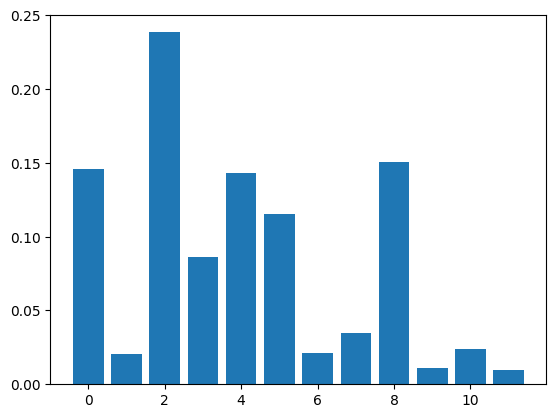

In [177]:
from matplotlib import pyplot
importance = best_model.feature_importances_

for i,v in enumerate(importance):
    print("Feature: %0d, Score : %.5f" % (i,v))

pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

In [178]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
CustomerId,,,,,,,,,,,,
15746451,686.0,1.0,41,7.0,102749.72,1.0,0.0,1,194913.86,0.0,0.0,1.0
15757895,569.0,1.0,30,6.0,106629.49,1.0,0.0,1,44114.88,0.0,1.0,0.0
15729454,465.0,1.0,33,8.0,0.00,2.0,1.0,0,177668.55,1.0,0.0,0.0
15590337,659.0,1.0,29,6.0,123192.12,1.0,1.0,1,56971.41,1.0,0.0,0.0
15727391,688.0,1.0,29,9.0,144553.50,2.0,1.0,0,143454.95,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15671293,779.0,0.0,37,2.0,128389.63,1.0,1.0,1,6589.16,0.0,1.0,0.0
15809347,763.0,1.0,32,9.0,160680.41,1.0,1.0,0,30886.35,0.0,1.0,0.0
15732268,751.0,1.0,29,3.0,159597.45,1.0,1.0,0,39934.41,1.0,0.0,0.0


In [179]:
#df = df.drop(columns=["Gender","Geography_France","Geography_Germany","Geography_Spain","HasCrCard","IsActiveMember"])

X = df.drop(columns="Exited")
X = StandardScaler().fit_transform(X)
y= df.Exited
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

rf = RandomForestClassifier()
rf_cval = cross_validate(rf,X_train,y_train,cv=4,scoring=("accuracy"),return_estimator=True)
rf_cval

{'fit_time': array([1.210109  , 1.23512411, 1.23212147, 1.22110271]),
 'score_time': array([0.06304717, 0.05505061, 0.05404949, 0.05404949]),
 'estimator': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'test_score': array([0.86785714, 0.8622449 , 0.85962226, 0.8575804 ])}

In [180]:
best_model = rf_cval['estimator'][0]
y_pred = best_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.96      0.86      0.91      1716
        True       0.44      0.73      0.55       244

    accuracy                           0.85      1960
   macro avg       0.70      0.80      0.73      1960
weighted avg       0.89      0.85      0.86      1960



Feature: 0, Score : 0.14546
Feature: 1, Score : 0.02105
Feature: 2, Score : 0.24197
Feature: 3, Score : 0.08767
Feature: 4, Score : 0.14430
Feature: 5, Score : 0.11375
Feature: 6, Score : 0.02004
Feature: 7, Score : 0.03355
Feature: 8, Score : 0.14700
Feature: 9, Score : 0.01137
Feature: 10, Score : 0.02287
Feature: 11, Score : 0.01095


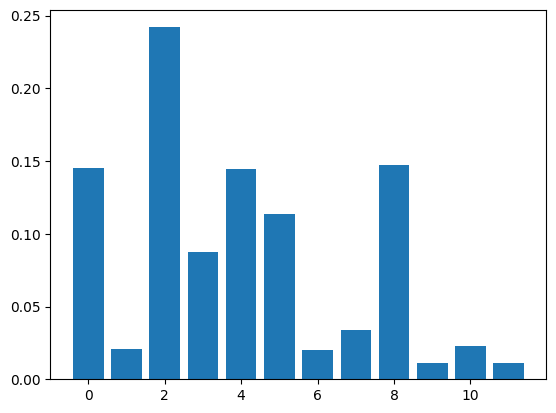

In [181]:
from matplotlib import pyplot
importance = best_model.feature_importances_

for i,v in enumerate(importance):
    print("Feature: %0d, Score : %.5f" % (i,v))

pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()